<a href="https://colab.research.google.com/github/sorooshms/Bachelor-Project/blob/main/Dense(CNN)_For_Recognizing_%26_Classification_Persian_Handwritten_Characters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Import google drive to colab*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries and proccess data
import tensorflow as tf
import sklearn
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn.model_selection import train_test_split
import cv2


# For reproducibility
np.random.seed(123)


# Import data
dataset = io.loadmat('/content/drive/MyDrive/matlab.mat')


# Shuffle data & take 20% for test
x_train, x_test, y_train, y_test = train_test_split( dataset['images'][:]
                                                    ,dataset['labels'][:]
                                                    ,test_size=0.20,random_state=42)


# Squeeze train data
x_train = np.squeeze(x_train)
y_train = np.squeeze(y_train)


# Squeeze test data
x_test=np.squeeze(x_test)
y_test=np.squeeze(y_test)


# Resize train data
x_train = [cv2.resize(img, dsize=(28, 28)) for img in x_train]
# Resize test data
x_test = [cv2.resize(img, dsize=(28, 28)) for img in x_test]


# Reshape train data
x_train = [x.reshape(28*28) for x in x_train]
# Reshape test data
x_test = [x.reshape(28*28) for x in x_test]


# Make train data to array
x_train = np.array(x_train)
# Make test data to array
x_test = np.array(x_test)


# Change train data type
x_train = x_train.astype('float32')
x_train /= 255
# Change test data type
x_test = x_test.astype('float32')
x_test /= 255


# Reshape train data
x_train = x_train.reshape(-1,28,28,1)
# Reshape test data
x_test = x_test.reshape(-1,28,28,1)

# Make train data to category in 34 class 
y_train = keras.utils.to_categorical(y_train, num_classes=34)
# Make test data to category in 34 class
y_test = keras.utils.to_categorical(y_test, num_classes=34)


# Slip train data for validation
x_val = x_train[0:5440]
y_val = y_train[0:5440]


# Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
temp2=model.add(layers.Flatten())
model.add(Dropout(0.5))
temp1=model.add(layers.Dense(34, activation='softmax'))

# Print the modael summary
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit model on training data
history = model.fit(x_train,y_train,
          epochs=700, batch_size=256, validation_data = (x_val, y_val),verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
# Save_file
model.save(input("\nEnter file path to save the model: "))


Enter file path to save the model: 
INFO:tensorflow:Assets written to: assets


In [ ]:
 #load_file
          Model = keras.models.load_model(input("\n\nEnter file path to load model: "))
          print("\n\nNumber of resume epoch")
          NuReEp = InCo()
          print("\n\nNumber of epochs")
          NuMode = InCo()
          print("\n\n")
          StTi = ProTim()
          print('\n\nbefor add Canny: ', numpy.shape(InMRs), end='\n\n')
          InMRs = list(numpy.reshape(InMRs, (462,256,256)))
          for i in range(numpy.shape(InMRs)[0]):

*Print Training & Validation Accuracy Plot*

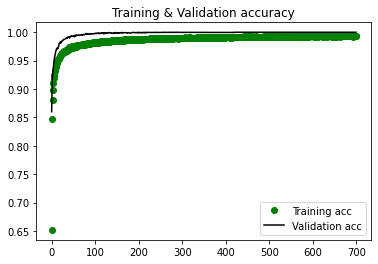

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc', color='green')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='black')
plt.title('Training & Validation accuracy')
plt.legend()

*Print Training & Validation Loss Plot*

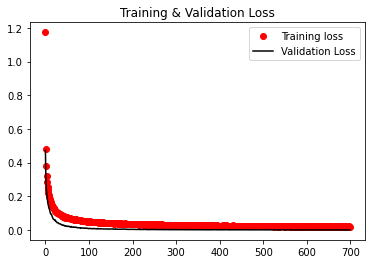

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color='black')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

*predict The Model With Tested Dataset*

In [ ]:
# prediction
from tensorflow import keras
from keras import models

#Predict the response for test dataset
y_pred = model.predict(x_test)

#predict with model
#y_pred=model.predict(x_test)


y_pred = np.argmax (y_pred , axis=1)
y_test_decode= np.argmax (y_test , axis=1)
print(y_pred)
print(y_test_decode)
print(y_pred.shape)
print(y_test_decode.shape)

[ 5 18 33 ...  9 28 23]
[ 5 18 18 ...  9 28 23]
(10880,)
(10880,)


*Classification Report*

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(y_test_decode, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       326
           1       0.98      0.97      0.97       332
           2       0.98      0.96      0.97       322
           3       0.94      0.95      0.94       294
           4       0.91      0.93      0.92       312
           5       0.97      0.94      0.95       324
           6       0.95      0.97      0.96       334
           7       0.94      0.98      0.96       325
           8       0.97      0.95      0.96       315
           9       0.99      0.97      0.98       316
          10       0.97      0.97      0.97       316
          11       0.97      0.98      0.98       343
          12       0.95      0.98      0.96       343
          13       0.96      0.94      0.95       332
          14       0.95      0.98      0.96       306
          15       0.97      0.98      0.98       308
          16       0.96      0.95      0.95       313
     

*Creating Confusion Matrix*

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.metrics import  confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(y_test_decode, y_pred))

Confusion Matrix
[[321   0   0 ...   0   0   0]
 [  0 322   7 ...   0   0   0]
 [  0   8 310 ...   0   0   0]
 ...
 [  0   0   0 ... 309   0   0]
 [  1   0   0 ...   0 288   0]
 [  0   0   0 ...   0   0 294]]


*Creating HeatMap*

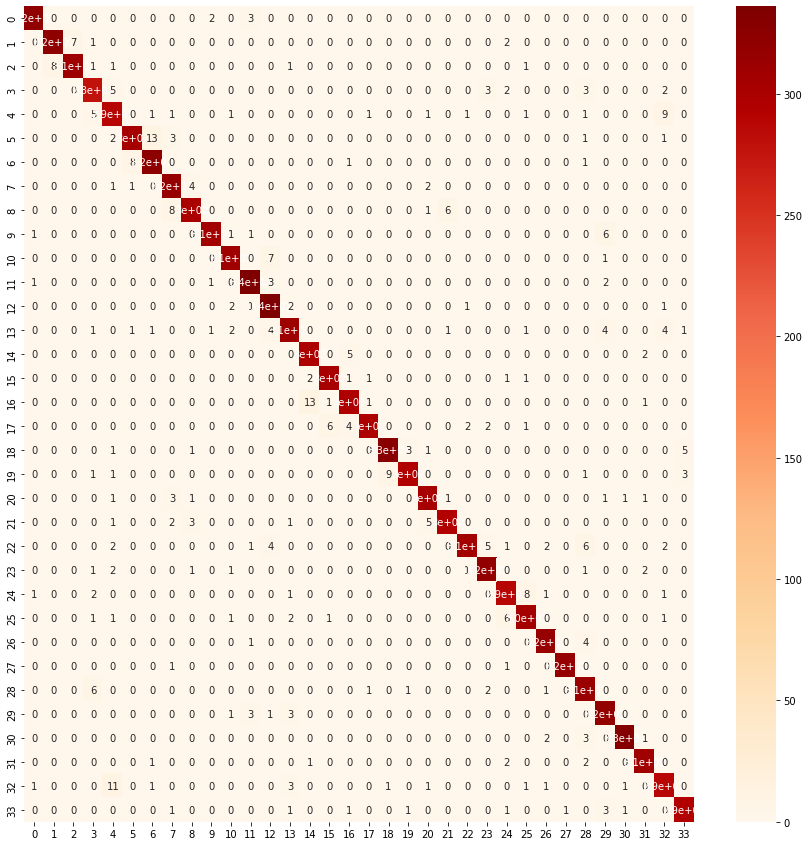

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import  confusion_matrix

df_cm = pd.DataFrame(confusion_matrix(y_test_decode,y_pred))
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True,cmap="OrRd")